In [8]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [4]:
dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

In [5]:
df = pd.DataFrame(data)
df.columns = columns
df['price'] = target

In [6]:
print(df.corr()) # show the correlation of dataframe variables
# correlation => 如果一个值的增大，会引起另外一个值一定增大，而且是定比例增大 相关系数就越接近于1
# correlation => 0 就是两者之间没有任何关系
# correlation => -1 一个值增大 另外一个值一定减小 而且减小是成相等比例的

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

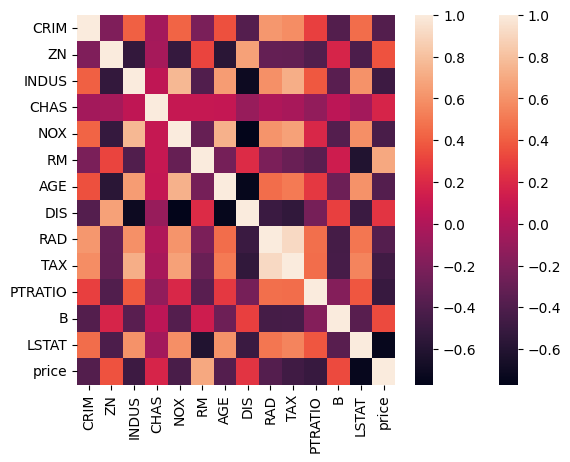

In [11]:
sns.heatmap(df.corr())
plt.show()


# RM：小区平均的卧室个数
# LSTAT: 低收入人群在周围的比例

In [13]:
rm = df['RM']
lstat = df['LSTAT']
price = df['price']
greater_then_most = np.percentile(price, 66)
df['expensive'] = df['price'].apply(lambda p: int(p>greater_then_most))
target = df['expensive']

In [14]:
print(df[:20])

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
def model(x, w, b):
    return sigmoid(np.dot(x, w.T) + b)

In [17]:
def loss(y_hat, y):
    return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [21]:
def partial_w(x, y, y_hat):
    return np.array([np.sum((y_hat - y) * x[0]), np.sum((y_hat - y) * x[1])])

In [22]:
def partial_b(x, y, y_hat):
    return np.sum(y_hat - y)

In [24]:
def optimize(w, b, x, y, yhat, pw, pd, learning_rate):
    w = w + -1 * pw(x, y, yhat) * learning_rate
    b = b + -1 * pd(x, y, yhat) * learning_rate
    return w, b

In [27]:
import random
def train(model_to_be_train, target, loss, pw, pd):
    w = np.random.random_sample((1,2))
    b = np.random.random()
    learning_rate = 1e-5
    epoch = 200
    losses = []

    for i in range(epoch):
        batch_loss = []
        for batch in range(len(rm)):
            # batch training
            index = random.choice(range(len(rm)))
            rm_x, lstat_x = rm[index], lstat[index]
            x = np.array([rm_x, lstat_x])
            y = target[index]

            yhat = model_to_be_train(x, w, b)
            loss_v = loss(yhat, y)

            batch_loss.append(loss_v)

            w, b = optimize(w, b, x, y, yhat, pw, pd, learning_rate)

            if batch % 100 == 0:
                print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_v))
        losses.append(np.mean(batch_loss))
    return model_to_be_train, w, b, losses

Linear Regression: 实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent Use Boston house price dataset.

北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？

Boston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易

北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区

Harder than deep learning:

1. compiler
2. programming language & automata
3. computer graphic
4. complexity system
5. computing complexity
6. operating system

In [38]:
def linear(x, w, b):
    # vectorized model
    return np.dot(x, w.T) + b

/Users/du/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Epoch: 0 Batch: 0, loss: nan
Epoch: 0 Batch: 100, loss: nan
Epoch: 0 Batch: 200, loss: nan
Epoch: 0 Batch: 300, loss: nan
Epoch: 0 Batch: 400, loss: nan
Epoch: 0 Batch: 500, loss: nan
Epoch: 1 Batch: 0, loss: nan
Epoch: 1 Batch: 100, loss: nan
Epoch: 1 Batch: 200, loss: nan
Epoch: 1 Batch: 300, loss: nan
Epoch: 1 Batch: 400, loss: nan
Epoch: 1 Batch: 500, loss: nan
Epoch: 2 Batch: 0, loss: nan
Epoch: 2 Batch: 100, loss: nan
Epoch: 2 Batch: 200, loss: nan
Epoch: 2 Batch: 300, loss: nan
Epoch: 2 Batch: 400, loss: nan
Epoch: 2 Batch: 500, loss: nan
Epoch: 3 Batch: 0, loss: nan
Epoch: 3 Batch: 100, loss: nan
Epoch: 3 Batch: 200, loss: nan
Epoch: 3 Batch: 300, loss: nan
Epoch: 3 Batch: 400, loss: nan
Epoch: 3 Batch: 500, loss: nan
Epoch: 4 Batch: 0, loss: nan
Epoch: 4 Batch: 100, loss: nan
Epoch: 4 Batch: 200, loss: nan
Epoch: 4 Batch: 300, loss: nan
Epoch: 4 Batch: 400, loss: nan
Epoch: 4 Batch: 500, loss: nan
Epoch: 5 Batch: 0, loss: nan
Epoch: 5 Batch: 100, loss: nan
Epoch: 5 Batch: 200,

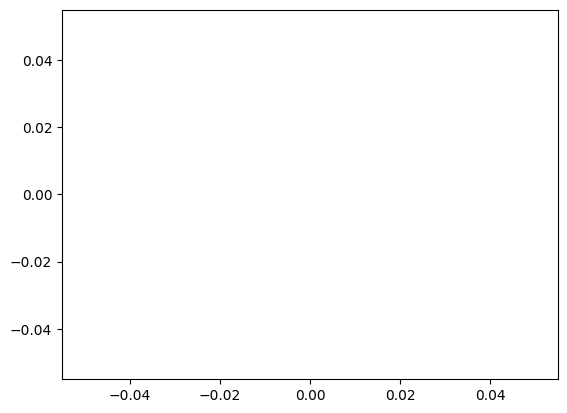

In [39]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    target = df['price']

    model, w, b, losses = train(linear, target, loss, partial_w, partial_b)
    plt.plot(losses)
    predicate = model(np.array([19, 7]), w, b)
    print(predicate)

    plt.show()

/Users/du/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Epoch: 0 Batch: 0, loss: nan
Epoch: 0 Batch: 100, loss: nan
Epoch: 0 Batch: 200, loss: nan
Epoch: 0 Batch: 300, loss: nan
Epoch: 0 Batch: 400, loss: nan
Epoch: 0 Batch: 500, loss: nan
Epoch: 1 Batch: 0, loss: nan
Epoch: 1 Batch: 100, loss: nan
Epoch: 1 Batch: 200, loss: nan
Epoch: 1 Batch: 300, loss: nan
Epoch: 1 Batch: 400, loss: nan
Epoch: 1 Batch: 500, loss: nan
Epoch: 2 Batch: 0, loss: nan
Epoch: 2 Batch: 100, loss: nan
Epoch: 2 Batch: 200, loss: nan
Epoch: 2 Batch: 300, loss: nan
Epoch: 2 Batch: 400, loss: nan
Epoch: 2 Batch: 500, loss: nan
Epoch: 3 Batch: 0, loss: nan
Epoch: 3 Batch: 100, loss: nan
Epoch: 3 Batch: 200, loss: nan
Epoch: 3 Batch: 300, loss: nan
Epoch: 3 Batch: 400, loss: nan
Epoch: 3 Batch: 500, loss: nan
Epoch: 4 Batch: 0, loss: nan
Epoch: 4 Batch: 100, loss: nan
Epoch: 4 Batch: 200, loss: nan
Epoch: 4 Batch: 300, loss: nan
Epoch: 4 Batch: 400, loss: nan
Epoch: 4 Batch: 500, loss: nan
Epoch: 5 Batch: 0, loss: nan
Epoch: 5 Batch: 100, loss: nan
Epoch: 5 Batch: 200,

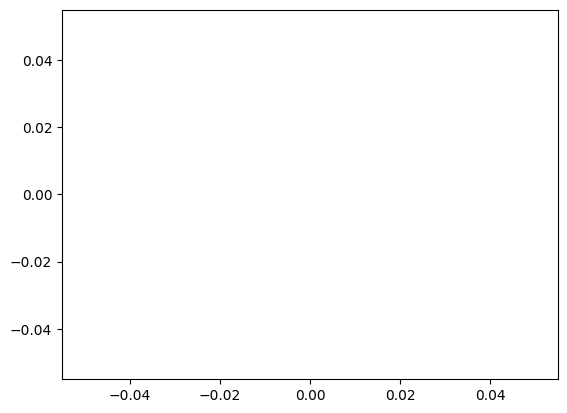

In [31]:
model, w, b, losses = train(model, target, loss, partial_w, partial_b)

Epoch: 0 Batch: 0, loss: -274.68290911439993
Epoch: 0 Batch: 100, loss: -181.2169929272908
Epoch: 0 Batch: 200, loss: -473.6196087390522
Epoch: 0 Batch: 300, loss: -426.16328975009037
Epoch: 0 Batch: 400, loss: -414.35753868392203
Epoch: 0 Batch: 500, loss: -465.3503914025991
Epoch: 1 Batch: 0, loss: -570.6585649721376
Epoch: 1 Batch: 100, loss: -623.6589293195659
Epoch: 1 Batch: 200, loss: -540.1963910131255
Epoch: 1 Batch: 300, loss: -611.2681737593035
Epoch: 1 Batch: 400, loss: -707.0101241711443
Epoch: 1 Batch: 500, loss: -inf
Epoch: 2 Batch: 0, loss: -inf
Epoch: 2 Batch: 100, loss: -inf
Epoch: 2 Batch: 200, loss: -inf
Epoch: 2 Batch: 300, loss: -inf
Epoch: 2 Batch: 400, loss: -inf
Epoch: 2 Batch: 500, loss: -inf
Epoch: 3 Batch: 0, loss: -inf
Epoch: 3 Batch: 100, loss: -inf
Epoch: 3 Batch: 200, loss: -inf
Epoch: 3 Batch: 300, loss: -inf
Epoch: 3 Batch: 400, loss: -inf
Epoch: 3 Batch: 500, loss: -inf
Epoch: 4 Batch: 0, loss: -inf
Epoch: 4 Batch: 100, loss: -inf
Epoch: 4 Batch: 200, 

/Users/du/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  



Epoch: 7 Batch: 0, loss: -inf
Epoch: 7 Batch: 100, loss: -inf
Epoch: 7 Batch: 200, loss: -inf
Epoch: 7 Batch: 300, loss: -inf
Epoch: 7 Batch: 400, loss: -inf
Epoch: 7 Batch: 500, loss: -inf
Epoch: 8 Batch: 0, loss: -inf
Epoch: 8 Batch: 100, loss: -inf
Epoch: 8 Batch: 200, loss: -inf
Epoch: 8 Batch: 300, loss: -inf
Epoch: 8 Batch: 400, loss: -inf
Epoch: 8 Batch: 500, loss: -inf
Epoch: 9 Batch: 0, loss: -inf
Epoch: 9 Batch: 100, loss: -inf
Epoch: 9 Batch: 200, loss: -inf
Epoch: 9 Batch: 300, loss: -inf
Epoch: 9 Batch: 400, loss: -inf
Epoch: 9 Batch: 500, loss: -inf
Epoch: 10 Batch: 0, loss: -inf
Epoch: 10 Batch: 100, loss: -inf
Epoch: 10 Batch: 200, loss: -inf
Epoch: 10 Batch: 300, loss: -inf
Epoch: 10 Batch: 400, loss: -inf
Epoch: 10 Batch: 500, loss: -inf
Epoch: 11 Batch: 0, loss: -inf
Epoch: 11 Batch: 100, loss: -inf
Epoch: 11 Batch: 200, loss: -inf
Epoch: 11 Batch: 300, loss: -inf
Epoch: 11 Batch: 400, loss: -inf
Epoch: 11 Batch: 500, loss: -inf
Epoch: 12 Batch: 0, loss: -inf
Epoch:

In [32]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5

In [33]:
for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], target[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM: {}, LSTAT: {}, EXPENSIVE: {}, Predicated: {}'.format(x1, x2, y, predicate_label))

RM: 4.88, LSTAT: 30.62, EXPENSIVE: 10.2, Predicated: 1
RM: 5.961, LSTAT: 9.88, EXPENSIVE: 21.7, Predicated: 1
RM: 7.358, LSTAT: 4.73, EXPENSIVE: 31.5, Predicated: 1
RM: 6.389, LSTAT: 9.62, EXPENSIVE: 23.9, Predicated: 1
RM: 6.242, LSTAT: 10.74, EXPENSIVE: 23.0, Predicated: 1
RM: 5.707, LSTAT: 12.01, EXPENSIVE: 21.8, Predicated: 1
RM: 5.95, LSTAT: 27.71, EXPENSIVE: 13.2, Predicated: 1
RM: 5.854, LSTAT: 23.79, EXPENSIVE: 10.8, Predicated: 1
RM: 6.657, LSTAT: 21.22, EXPENSIVE: 17.2, Predicated: 1
RM: 5.952, LSTAT: 17.15, EXPENSIVE: 19.0, Predicated: 1
RM: 6.405, LSTAT: 8.2, EXPENSIVE: 22.0, Predicated: 1
RM: 4.906, LSTAT: 34.77, EXPENSIVE: 13.8, Predicated: 1
RM: 6.03, LSTAT: 18.8, EXPENSIVE: 16.6, Predicated: 1
RM: 6.096, LSTAT: 10.26, EXPENSIVE: 18.2, Predicated: 1
RM: 6.245, LSTAT: 7.54, EXPENSIVE: 23.4, Predicated: 1
RM: 5.857, LSTAT: 21.32, EXPENSIVE: 13.3, Predicated: 1
RM: 7.802, LSTAT: 1.92, EXPENSIVE: 50.0, Predicated: 1
RM: 7.929, LSTAT: 3.7, EXPENSIVE: 50.0, Predicated: 1
RM: 5

In [34]:
# 剩下一件事情，就是要检查我们这个模型的准确度到底如何！！
"""
如何衡量模型的好坏：
1. accuracy 准确度
2. precision 精确度
3. recall 召回率
4. f1, f2 score
5. AUC-ROC 曲线
引出一个非常非常重要的概念： =》 过拟合 和 欠拟合 （over-fitting and under-fitting）
整个机器学习的过程，就是在不断的进行过拟合和欠拟合的调整！
"""

'\n如何衡量模型的好坏：\n1. accuracy 准确度\n2. precision 精确度\n3. recall 召回率\n4. f1, f2 score\n5. AUC-ROC 曲线\n引出一个非常非常重要的概念： =》 过拟合 和 欠拟合 （over-fitting and under-fitting）\n整个机器学习的过程，就是在不断的进行过拟合和欠拟合的调整！\n'

# 代码复现

In [41]:
# 导入包
# 用于加载波士顿房价数据集
from sklearn.datasets import load_boston 
# pandas工具包 对于pandas陌生的同学可以参考官方10分钟上手教程：https://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd 
# seaborn 用于画图
import seaborn as sns
import numpy as np # numpy
# 显示画图
%matplotlib inline

In [42]:
data = load_boston()

In [43]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [44]:
df = pd.DataFrame(data['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 表 ：波士顿房价数据集缩写特征的中文描述
```
名称	中文描述
CRIM	住房所在城镇的人均犯罪率
ZN	住房用地超过 25000 平方尺的比例
INDUS	住房所在城镇非零售商用土地的比例
CHAS	有关查理斯河的虚拟变量（如果住房位于河边则为1,否则为0 ）
NOX	一氧化氮浓度
RM	每处住房的平均房间数
AGE	建于 1940 年之前的业主自住房比例
DIS	住房距离波士顿五大中心区域的加权距离
RAD	离住房最近的公路入口编号
TAX 每 10000 美元的全额财产税金额
PTRATIO	
住房所在城镇的师生比例
B	1000(Bk-0.63)^2,其中 Bk 指代城镇中黑人的比例
LSTAT	弱势群体人口所占比例
MEDV	业主自住房的中位数房价（以千美元计）
```

In [46]:
df.columns = data['feature_names']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
df['price'] = data['target']
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


<AxesSubplot:>

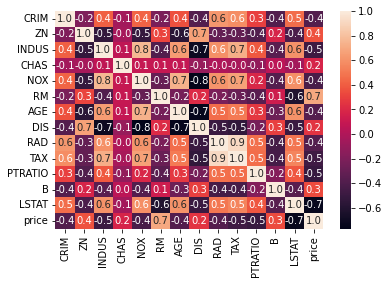

In [48]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

In [49]:
import matplotlib.pyplot as plt

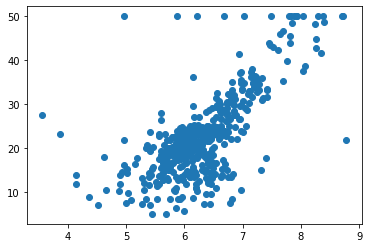

In [50]:
plt.scatter(df['RM'], df['price'])

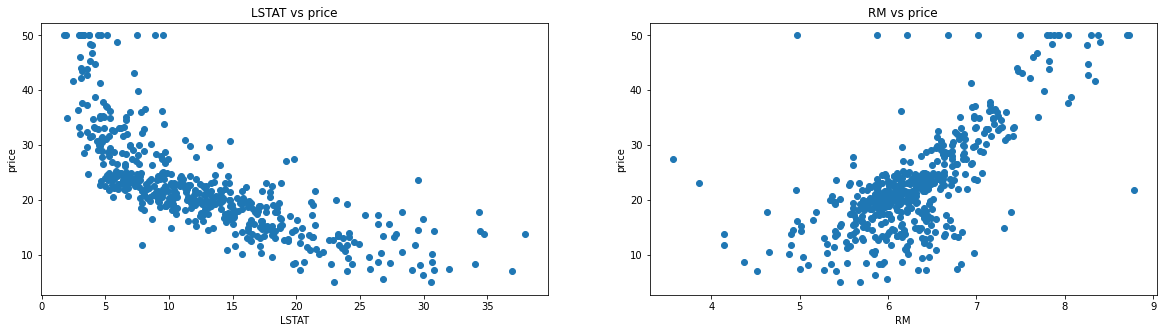

In [51]:
plt.figure(figsize = (20, 5))

features = ['LSTAT', 'RM']
target = df['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title('{} vs price'.format(col))
    plt.xlabel(col)
    plt.ylabel('price')

In [52]:
x = df['RM']
y = df['price']

In [53]:
history_notes = {_x: _y for _x, _y in zip(x, y)}
history_notes[6.575]

24.0

In [54]:
similary_ys = [y for _, y in sorted(history_notes.items(), key = lambda x_y: (x_y[0] - 6.57) ** 2)[:3]]
similary_ys

[23.8, 24.0, 24.8]

In [55]:
np.mean(similary_ys)

24.2

In [56]:
## K-Neighbor-Nearst

In [57]:
def knn(query_x, history, top_n = 3):
    sorted_notes = sorted(history.items(), key = lambda x_y: (x_y[0] - query_x) **2)
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _, x in similar_notes]

    return np.mean(similar_ys)

In [58]:
knn(5.4, history_notes)

22.53280632411067

In [59]:
def loss(yhat, y):
    return np.mean((yhat - y) **2)

In [60]:
import random

In [61]:
min_loss = float('inf')
best_k, bes_b = None, None

print(min_loss)

inf


In [62]:
for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i + b for rm_i in x]
    current_loss = loss(y_hats, y)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('{}，we have func f(fm) = {} * rm + {}, loss is: {} now'.format(step, k, b, current_loss))

0，we have func f(fm) = 73 * rm + 65, loss is: 253302.3010250257 now
1，we have func f(fm) = -18 * rm + 7, loss is: 16957.921473573126 now
7，we have func f(fm) = -10 * rm + 23, loss is: 4114.538768181818 now
14，we have func f(fm) = 15 * rm + -65, loss is: 106.1222679347826 now
61，we have func f(fm) = 3 * rm + 5, loss is: 63.69171664624505 now
72，we have func f(fm) = 6 * rm + -16, loss is: 49.02242231620553 now


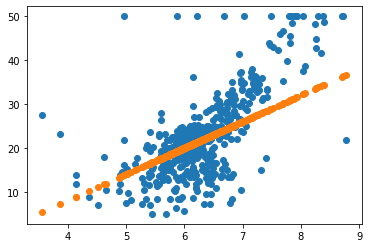

In [63]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

In [64]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k*x+b-y) *x)

In [65]:
def partial_b(k, b, x, y):
    return 2*np.mean(k*x+b-y)

In [66]:
k, b = random.random(), random.random()
min_loss = float('inf')
best_k, best_b = None, None
learning_rate = 1e-2

In [67]:
for step in range(2000):
    k,b = k+(-1*partial_k(k,b,x,y) * learning_rate), b+(-1*partial_b(k,b,x,y) * learning_rate)
    y_hats = k * x +b
    current_loss = loss(y_hats, y)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('On the {} step, we have func f(rm) = {} * rm + {}, loss is {} now'.format(step, k, b, current_loss))

On the 0 step, we have func f(rm) = 3.030110232034107 * rm + 0.9075161627430077, loss is 68.43334034148575 now
On the 1 step, we have func f(rm) = 3.414501153980315 * rm + 0.9591592667362004, loss is 59.55186044016795 now
On the 2 step, we have func f(rm) = 3.4849702483711313 * rm + 0.9614543805245495, loss is 59.25536522976081 now
On the 3 step, we have func f(rm) = 3.498790633945628 * rm + 0.9548461421600503, loss is 59.23843186343338 now
On the 4 step, we have func f(rm) = 3.5023882690650456 * rm + 0.9466329471542823, loss is 59.230605548162515 now
On the 5 step, we have func f(rm) = 3.504140902768159 * rm + 0.9381318196209368, loss is 59.223079290018845 now
On the 6 step, we have func f(rm) = 3.505560333278686 * rm + 0.929580421397478, loss is 59.21556629954901 now
On the 7 step, we have func f(rm) = 3.5069193706672968 * rm + 0.9210216391025501, loss is 59.20805723616327 now
On the 8 step, we have func f(rm) = 3.508267244660897 * rm + 0.9124632113913975, loss is 59.200551794017315 

In [68]:
best_k, best_b

(5.6367079761449865, -12.62679603254597)

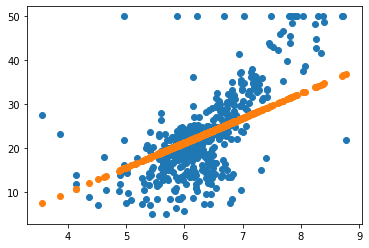

In [70]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

In [71]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

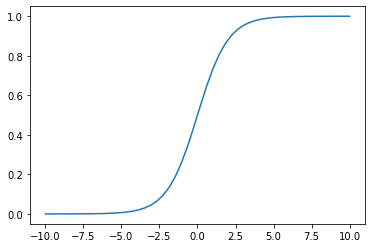

In [72]:
sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

In [73]:
def random_linear(x):
    k, b = random.random(), random.random()
    return k * x + b


In [74]:
def complex_function(x):
    return (random_linear(x))

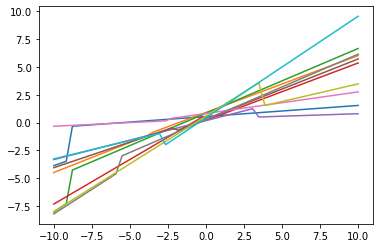

In [76]:
for _ in range(10):
    index = random.randrange(0, len(sub_x))
    sub_x_1, sub_x_2 = sub_x[:index], sub_x[index:]
    new_y = np.concatenate((complex_function(sub_x_1), complex_function(sub_x_2)))
    plt.plot(sub_x, new_y)

In [77]:
import numpy as np
import pandas as pd

In [78]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [85]:
X = boston.data
y = boston.target

In [86]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [83]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(df)
df = pd.DataFrame(X, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [84]:
df['bias'] = 1
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

In [88]:
print('X_train.shape, y_train.shape:', X_train.shape, y_train.shape)
print('X_test.shape, y_test.shape', X_test.shape, y_test.shape)

X_train.shape, y_train.shape: (404, 13) (404,)
X_test.shape, y_test.shape (102, 13) (102,)


In [89]:
X_train = np.array(X_train)

In [90]:
def l1_cost(X, y, theta):
    """
    X: 特征
    y: 目标值
    theta: 模型参数
    """
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost =+ 1/k * np.abs(y[i] - theta.dot(X[i, :]))
    return total_cost

In [91]:
def l2_cost(X, y, theta):
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * (y[i] - theta.dot(X[i, :])) ** 2
    return total_cost

In [93]:
np.zeros(10).shape

(10,)

In [94]:
def step_l1_gradient(X, y, learning_rate, theta):
    """
    计算MAE损失函数的梯度的函数
    对于0处的不可微分点返回梯度值0
    X:特征向量
    y：目标值
    learing_rate:学习率
    theta:参数
    """

    n = X.shape[0]
    print(n)
    e = y - X @ theta
    gradients = -(X.T @ np.sign(e)) / n
    theta = theta - learning_rate * gradients
    return theta

In [95]:
def step_l2_gradient(X, y, learning_rate, theta):
    k = X.shape[0]
    x = X.shape[1]
    gradients = np.zeros(n)
    for i in range(k):
        for j in range(n):
            gradients[j] += (-2/k) * (y[i] - (theta.dot(X[i, :]))) * X[i, j]
    theta = theta - learning_rate * gradients
    return theta

In [96]:
def step_gradient(X, y, learning_rate, theta):
    """
    X:特征向量
    y：目标值
    learing_rate:学习率
    theta:参数
    """
    m_deriv = 0
    N = len(X)
    for i in range(N):
        # 计算偏导
        # -x(y - (mx + b)) / |mx + b|
        m_deriv += - X[i] * (y[i] - (theta*X[i] + b)) / abs(y[i] - (theta*X[i] + b))
    # We subtract because the derivatives point in direction of steepest ascent
    theta -= (m_deriv / float(N)) * learning_rate
#     theta = theta - learning_rate * gradients
    return theta

In [97]:
def gradient_descent(X_train, y_train, learning_rate, iterations):
    k = X_train.shape[0]
    n = X_train.shape[1]
    theta = np.zeros(n)
    loss_values = []
    print(theta.shape)
    for i in range(iterations):
        theta = step_l1_gradient(X_train, y_train, learning_rate, theta)
        loss = l1_cost(X_train, y_train, theta)
        loss_values.append(loss)
        print(i, 'cost:', loss)
    return theta, loss_values

In [98]:
# 训练参数
learning_rate = 0.04 # 学习率
iterations = 300 # 迭代次数
theta ,loss_values= gradient_descent(X_train, y_train, learning_rate, iterations)

(13,)
404
0 cost: 18.46243343350999
404
1 cost: 0.046039603960396046
404
2 cost: 18.46243343350999
404
3 cost: 0.046039603960396046
404
4 cost: 18.46243343350999
404
5 cost: 0.046039603960396046
404
6 cost: 18.46243343350999
404
7 cost: 0.046039603960396046
404
8 cost: 18.46243343350999
404
9 cost: 0.046039603960396046
404
10 cost: 18.46243343350999
404
11 cost: 0.046039603960396046
404
12 cost: 18.46243343350999
404
13 cost: 0.046039603960396046
404
14 cost: 18.46243343350999
404
15 cost: 0.046039603960396046
404
16 cost: 18.46243343350999
404
17 cost: 0.046039603960396046
404
18 cost: 18.46243343350999
404
19 cost: 0.046039603960396046
404
20 cost: 18.46243343350999
404
21 cost: 0.046039603960396046
404
22 cost: 18.46243343350999
404
23 cost: 0.046039603960396046
404
24 cost: 18.46243343350999
404
25 cost: 0.046039603960396046
404
26 cost: 18.46243343350999
404
27 cost: 0.046039603960396046
404
28 cost: 18.46243343350999
404
29 cost: 0.046039603960396046
404
30 cost: 18.4624334335099